In [23]:
import keras

In [25]:
# load MINIST dataset
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [26]:
# check dataset shape
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


(-0.5, 27.5, 27.5, -0.5)

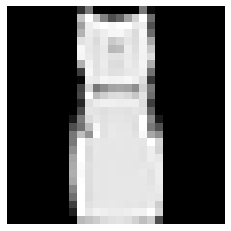

In [27]:
# Let's check the images randomly
import matplotlib.pyplot as plt
%matplotlib inline
import random
c = random.randint(0, 59999)
plt.imshow(x_train[c], cmap='gray')
plt.axis('off')

In [28]:
# see the differece x_train[c] 
import pandas as pd
pd.DataFrame(x_train[c])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,48,...,13,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,195,...,109,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,159,...,81,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,179,...,108,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,225,...,169,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,247,...,201,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,245,...,221,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,176,...,173,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,62,...,113,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,7,...,55,0,0,0,0,0,0,0,0,0


In [29]:
# Data Preprocessing
# 1. Normalization
#  Keras matches the normalized images while preparing weights randomly
#  (1) method: 0~ 1 (2) method: -1~1
#  keras MLP: must be 1D
x_train_shaped = x_train.reshape(60000, 784) / 255 
x_test_shaped = x_test.reshape(10000, 784) / 255 

# Demo: x_train_shaped
x_train_shaped[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00392157, 0.        , 0.        , 0.        , 0.        ,
       0.16078431, 0.7372549 , 0.40392157, 0.21176471, 0.18823529,
       0.16862745, 0.34117647, 0.65882353, 0.52156863, 0.0627451 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00392157, 0.        , 0.        , 0.        ,
       0.19215686, 0.53333333, 0.85882353, 0.84705882, 0.89411765,
       0.9254902 , 1.        , 1.        , 1.        , 1.        ,
       0.85098039, 0.84313725, 0.99607843, 0.90588235, 0.62745098,
       0.17647059, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.05490196, 0.69019608, 0.87058824, 0.87843137,
       0.83137255, 0.79607843, 0.77647059, 0.76862745, 0.78431373,
       0.84313725, 0.8       , 0.79215686, 0.78823529, 0.78823

In [31]:
# 2. Answer Preprocessing --> One-hot encoding
# Ans: [P0, P1, P2.....P9]
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print('before one-hot encoding: ', y_train[10])
print('after one-hot encoding:', y_train_cat[10])

before one-hot encoding:  0
after one-hot encoding: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [38]:
# Build the model
# 1. Framework -> (Sequential), Adding layers --> (Layers)
#  Layers: Fully-connected layers
from keras.models import Sequential
from keras.layers import Dense

mlp = Sequential()
# First layer: input_dim --> indicate how many of  inputs
mlp.add(Dense(512, activation='relu', input_dim = 784))
mlp.add(Dense(256, activation='relu'))
mlp.add(Dense(128, activation='relu'))
mlp.add(Dense(10, activation='softmax'))     
mlp.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_12 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_13 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Confirm the training model
# Random (weights) --> gradient decent
# loss: one output --> binary_crossentroy; multiple output --> categorical_crossentropy
# optimizer: optimize as it goest decently, --> based on Momentum (動量)
mlp.compile(loss = 'categorical_crossentropy', 
                    metrics = ['accuracy'],
                    optimizer = 'adam',
                    )

In [40]:
# batch: 看幾筆(200)作一次梯度下降(修正)
# epochs: 整份題目看幾次(10)
# 10 epochs, 200 batchs: 60000 * 10 / 200 --> 3000(次)
mlp.fit(x_train_shaped, 
            y_train_cat, 
            batch_size=200, 
            epochs= 15, 
#           verbose=0 (沒有); verbose=1(完整); verbose=2 
            validation_split=0.1 )

Epoch 1/15
270/270 [==============================] - 7s 24ms/step - loss: 0.7225 - accuracy: 0.7495 - val_loss: 0.4109 - val_accuracy: 0.8550
Epoch 2/15
270/270 [==============================] - 6s 23ms/step - loss: 0.3798 - accuracy: 0.8618 - val_loss: 0.3833 - val_accuracy: 0.8547
Epoch 3/15
270/270 [==============================] - 6s 23ms/step - loss: 0.3322 - accuracy: 0.8760 - val_loss: 0.3534 - val_accuracy: 0.8718
Epoch 4/15
270/270 [==============================] - 6s 22ms/step - loss: 0.3090 - accuracy: 0.8875 - val_loss: 0.3303 - val_accuracy: 0.8797
Epoch 5/15
270/270 [==============================] - 6s 23ms/step - loss: 0.2770 - accuracy: 0.8956 - val_loss: 0.3173 - val_accuracy: 0.8827
Epoch 6/15
270/270 [==============================] - 6s 24ms/step - loss: 0.2657 - accuracy: 0.9009 - val_loss: 0.3524 - val_accuracy: 0.8707
Epoch 7/15
270/270 [==============================] - 6s 22ms/step - loss: 0.2555 - accuracy: 0.9036 - val_loss: 0.3126 - val_accuracy: 0.8838

In [41]:
mlp.evaluate(x_test_shaped, y_test_cat)

313/313 [==============================] - 1s 4ms/step - loss: 0.3414 - accuracy: 0.8899


[0.34135985374450684, 0.8899000287055969]

In [42]:
# model.predict -> probabilibty; model.predict_classes -> classfication
# mlp.predict(x_test_shaped)
pre = mlp.predict_classes(x_test_shaped)

from sklearn.metrics import confusion_matrix
# confusion_matrix(y_test, pre)
pd.DataFrame(confusion_matrix(y_test, pre))

C:\Users\User\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,0,1,2,3,4,5,6,7,8,9
0,866,2,21,17,6,0,79,0,9,0
1,2,972,3,16,5,0,1,0,1,0
2,14,0,772,10,143,0,60,0,1,0
3,18,7,15,917,17,0,20,0,5,1
4,2,0,65,49,836,0,48,0,0,0
5,0,0,0,0,0,967,0,17,1,15
6,131,0,82,27,80,0,673,0,7,0
7,0,0,0,0,0,10,0,969,0,21
8,4,0,3,2,8,3,6,3,971,0
9,0,0,0,1,0,3,1,39,0,956


1101


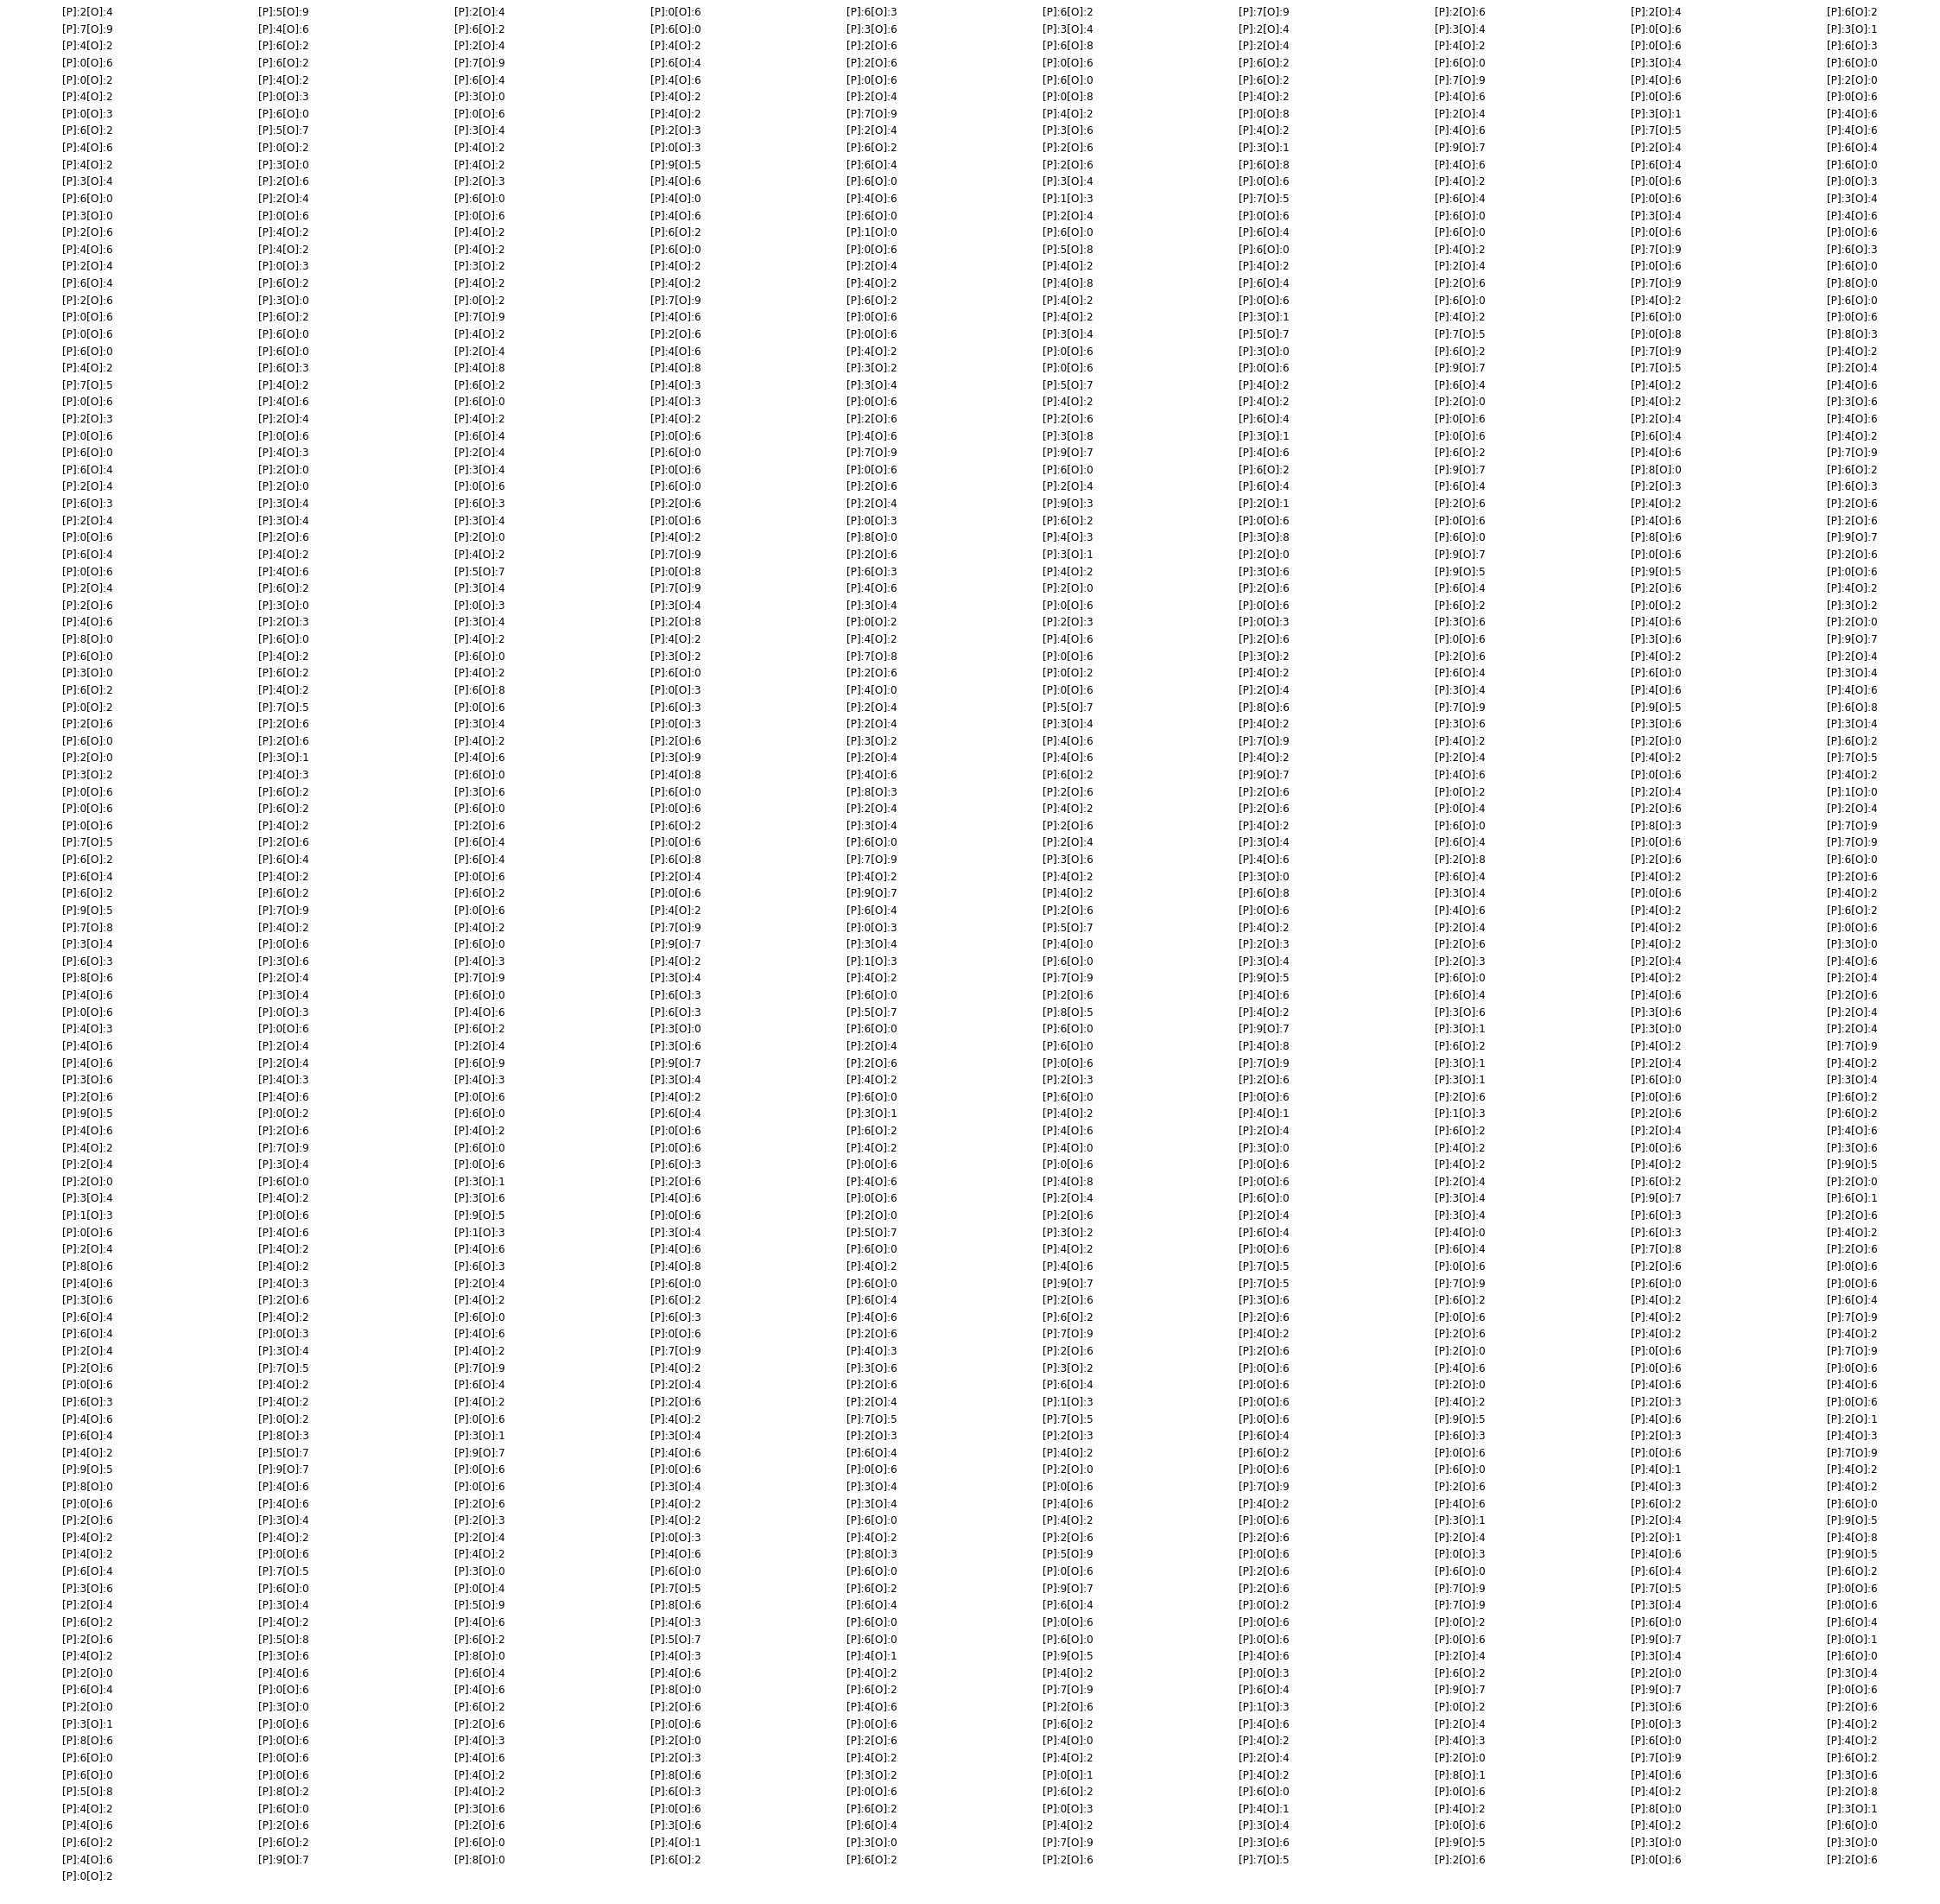

In [44]:
# numpy: compare each numbers of two sets
import numpy as np
# list: list (one number)
# numpy array: nparray (many numbers)
diff = np.nonzero(pre != y_test)[0]

# Correct label (original data)
orifalse = y_test[diff]
#  Wrong prediction
prefalse = pre[diff]
# take images from x_test dataset
imgfalse = x_test[diff]
# print(len(imgfalse))

# set width, hight fot the plot
plt.figure(figsize=(40, 40))
# each row has 10 images
width = 10
hight = len(imgfalse) / 10 + 1
for (i, img) in enumerate(imgfalse):
    # (row, column, from i images...)
    plt.subplot(hight, width, i+1)
    plt.axis('off')
    t = '[P]:' + str(prefalse[i]) + '[O]:' + str(orifalse[i])
    plt.title(t)
    plt.imshow(img, cmap='gray')